<a href="https://colab.research.google.com/github/MelihKlc/Machine-Learning/blob/main/k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values #burda customerid leri katmadık çünkü bizim ileride oluşturacağımız patternde herhangi bir işlevi olmayacak sadece 1 den başlayarak sırayla giden bir sayı dizisi bu çünkü
#aslında gender ve age de relevant features lar fakat biz bunu en sonunda çizdireceğiz ve eğer 3 boyutlu veya 4 boyutlu çizdirmek istersek bu çok zor olacak bu yüzden pattern bulurken en çok işimize yarayan 2 feature u seçeceğiz yani annual income ve spending score. bunları seçtiğimizde 2 boyutlu şekilde clusterlarımızı daha kolay şekilde göreceğiz
#[3,4] dediğimizde column kısmına yazdığımız için burda range le seçmedik direkt 3. ve 4. columnları seçtik bu da iloc içinde column seçmenin farklı bir yöntemi.

## Using the elbow method to find the optimal number of clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

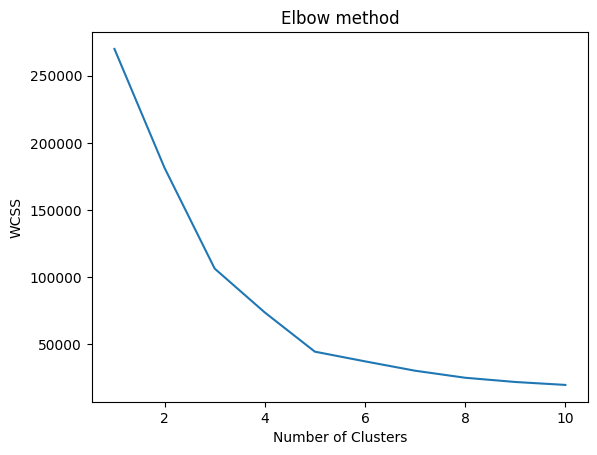

In [ ]:
from sklearn.cluster import KMeans #normalde burda direkt object belirliyorduk ama bu sefer öyle yapmayacağız. for loop kullanacağız çünkü biz burada 1 clusterdan 10 clustera kadar hepsini tek tek denemek istiyoruz.
wcss = []  #burada boş bir liste oluşturduk ve içini clusterlarla dolduracağız.
for i in range(1 , 11): #burda da 10 cluster oluşturup hepsine bakacağımız için for loop kullandık.
    kmeans = KMeans(n_clusters  = i, init = 'k-means++' , random_state = 42) #burda init parametresin k-means++ seçmemiz gerekiyor random initialization trap a yakalanmamak için.
    kmeans.fit(X) #herhangi bir algoritmayı çalıştırmak veya train etmek için fit methodu kullanıyoruz.
    wcss.append(kmeans.inertia_) # appendle listenin içine atıyoruz değerleri .inertia attribute u ile wcss değerlerini alıyoruz yani datapointlerin centroide uzaklıkları toplamı
#pythonda for loopuna girerken in range yapıyoruz sonra alt satıra inip bir satır ileri gidiyoruz bu demek oluyo ki for loopunun icindeyiz for loopun içinden çıkacağımız zaman alt satıra geçip en sol baştan kodları yazmaya devam ediyoruz.
plt.plot(range(1 , 11) ,wcss )
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show() #şimdi grafiği çizdirdik. Grafiğimizde gördüğümüz gibi 5 değerinden sonra aşırı yavaş düşüyor bu yüzden main clusterı 5 seçiyoruz her zaman böyle yavaş düşmeye başladığı noktayı seçiyoruz.

## Training the K-Means model on the dataset

In [ ]:
kmeans = KMeans(n_clusters  = 5, init = 'k-means++' , random_state = 42) #burda init parametresin k-means++ seçmemiz gerekiyor random initialization trap a yakalanmamak için.
y_kmeans = kmeans.fit_predict(X) #yukardaki for loopunun sonucunda 5 cluster olması gerektiğini belirlediğimiz için artık 5 değerini direkt girdik ve artık bizim dependent variable larımız 1 2 3 4 5 oldu
#fit_predict metodu da direkt bu dependent variable ları oluşturuyor.
#kmeans algoritmasını trainlememizim sonucunda y_kmeans dependent variable larını oluşturmuş olduk

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print(y_kmeans) #burda yazdırılan 0 1 2 gibi değerler bize customerların hangi clusterda olduğunu söylüyor. 0 lar cluster 1 de, 1 ler cluster 2 de gibi

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


## Visualising the clusters

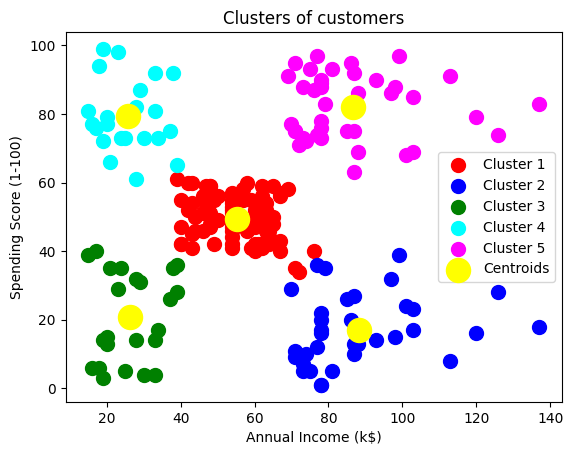

In [ ]:
plt.scatter(X[y_kmeans == 0 , 0] , X[y_kmeans == 0 , 1] , s = 100 , c = 'red' , label = 'Cluster 1') #biz burda X in icindeki değerlerden seçim yapıyoruz. ilk girdiğimiz 1. clusterdakileri almak için ve ikinci girdiğimiz 0 ise annual income oluyor(bunlar x koordinatı içindi). şimdi y koordinatları için yine y_kmeans 0 dedik çünkü hala 1. clustera bakıyoruz ama bu sefer column olarak 1 diyerek spending score u seçtik.
#s = 100 dediğimiz şey noktalar büyük olsun diye size yani.
plt.scatter(X[y_kmeans ==  1, 0] , X[y_kmeans == 1 , 1] , s = 100 , c = 'blue' , label = 'Cluster 2')
plt.scatter(X[y_kmeans ==  2, 0] , X[y_kmeans == 2 , 1] , s = 100 , c = 'green' , label = 'Cluster 3')
plt.scatter(X[y_kmeans ==  3, 0] , X[y_kmeans == 3 , 1] , s = 100 , c = 'cyan' , label = 'Cluster 4')
plt.scatter(X[y_kmeans ==  4 ,0] , X[y_kmeans == 4 , 1] , s = 100 , c = 'magenta' , label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
